# 1. 당뇨병 데이터로 회귀 분석하기 

## 데이터 확인용 모듈 사용하기 

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 데이터 분석용 모듈 사용하기 

In [26]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score

## 스케일작업용 모듈 사용하기 

In [28]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## 모델 평가용 모듈 사용하기 

In [27]:
from sklearn.metrics import r2_score,mean_squared_error

## 모델 작성용 모듈 사용하기 

In [29]:
from sklearn.neighbors import KNeighborsRegressor

## 기본 제굥 데이터 로드하기 

In [3]:
load_dia = load_diabetes()

## 데이터를 확이하기 위해 데이터프레임으로 변형하기 

In [4]:
df_dia = pd.DataFrame(load_dia['data'], columns=load_dia['feature_names'])

In [5]:
df_dia.shape

(442, 10)

In [6]:
df_dia.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

In [7]:
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


## 데이터를 학습과 테스트용으로 분리하기 

In [8]:
X_train, X_test, y_train, y_test = train_test_split( load_dia.data, load_dia.target,test_size=0.25, random_state=42)

In [9]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [10]:
X_train.shape, X_test.shape 

((331, 10), (111, 10))

In [11]:
X_test.shape [0]/load_dia.data.shape[0]

0.251131221719457

## 데이터를 시각화해서 상태를 확인하기 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
## 4개의 칼럼을 쌍으로 비교해보기 

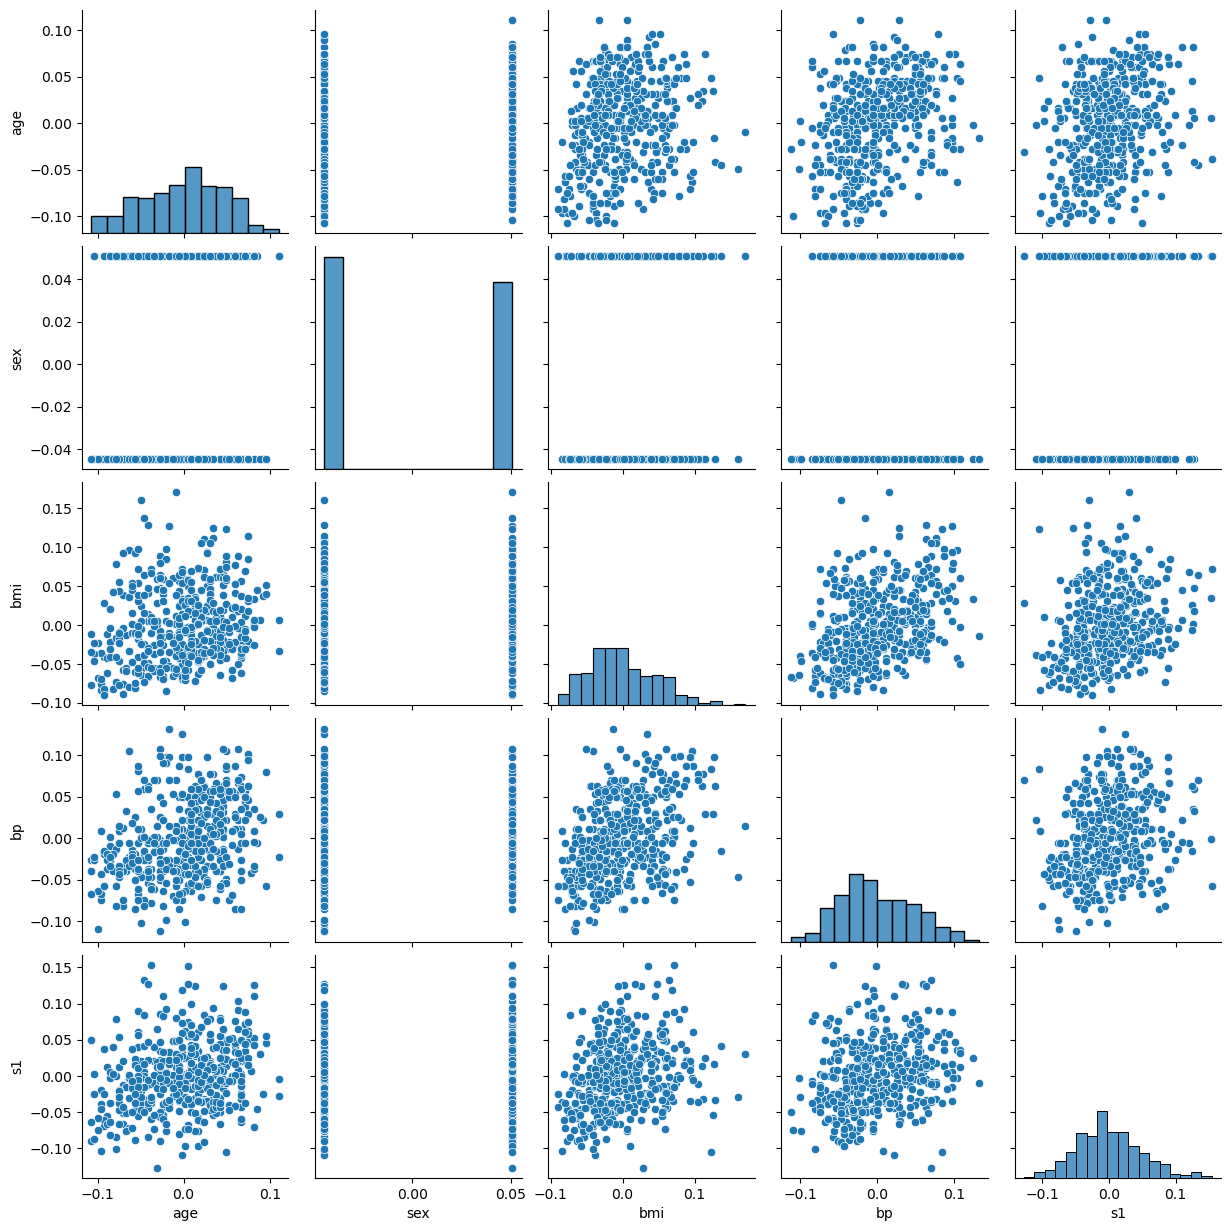

In [14]:
sns.pairplot(df_dia[['age','sex','bmi','bp','s1']])

## 성별을 구분해서 그래프 확인하기 

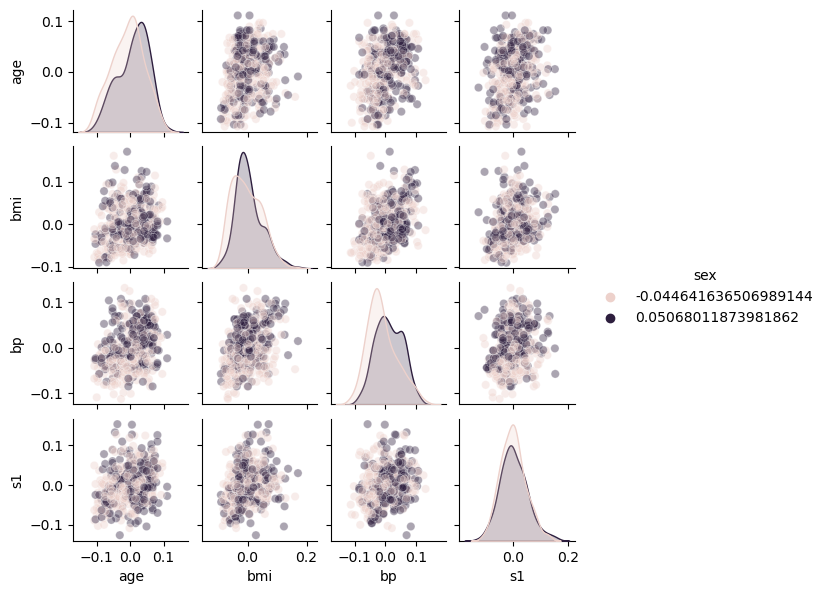

In [15]:
sns.pairplot(df_dia[['age','sex','bmi','bp','s1']], 
            size=1.5, hue='sex',plot_kws={'alpha':0.4})

## 모델 생성

In [16]:
knn = KNeighborsRegressor(n_neighbors=3)

## 모델 학습(train)

In [17]:
fit = knn.fit(X_train, y_train)

In [18]:
fit

KNeighborsRegressor(n_neighbors=3)

## 모델 검증(test) 

In [19]:
pred = fit.predict(X_test)

In [20]:
metrics = mean_squared_error(y_test, pred)

In [21]:
metrics

3471.41941941942

In [22]:
np.sqrt(metrics)

58.91875269741732

In [30]:
r2_score(y_test, pred)

0.37222167132521977

## 모델학습 

In [23]:
model = KNeighborsRegressor(10)

## 모델검증(교차검증)

In [24]:
metrics_ar = cross_val_score(model,load_dia.data, load_dia.target, cv=5, scoring="neg_mean_squared_error" )

In [25]:
np.sqrt(abs(metrics_ar))

array([56.62820991, 58.53572711, 59.89943371, 55.1316101 , 57.29399262])

In [32]:
metrics_ar_r = cross_val_score(model,load_dia.data, load_dia.target, cv=5, scoring="r2" )

In [33]:
metrics_ar_r

array([0.34196995, 0.45993106, 0.42671668, 0.42063684, 0.49269841])